In [1]:
!pip install diffusers["torch"]

  Using cached accelerate-1.6.0-py3-none-any.whl.metadata (19 kB)
Using cached accelerate-1.6.0-py3-none-any.whl (354 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 288.9 kB/s eta 0:00:00a 0:00:01


In [1]:
from PIL import Image
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae", use_safetensors=True)
tokenizer = CLIPTokenizer.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="tokenizer")
text_encoder = CLIPTextModel.from_pretrained(
    "CompVis/stable-diffusion-v1-4", subfolder="text_encoder", use_safetensors=True
)
unet = UNet2DConditionModel.from_pretrained(
    "CompVis/stable-diffusion-v1-4", subfolder="unet", use_safetensors=True
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.46805197..1.2184488].


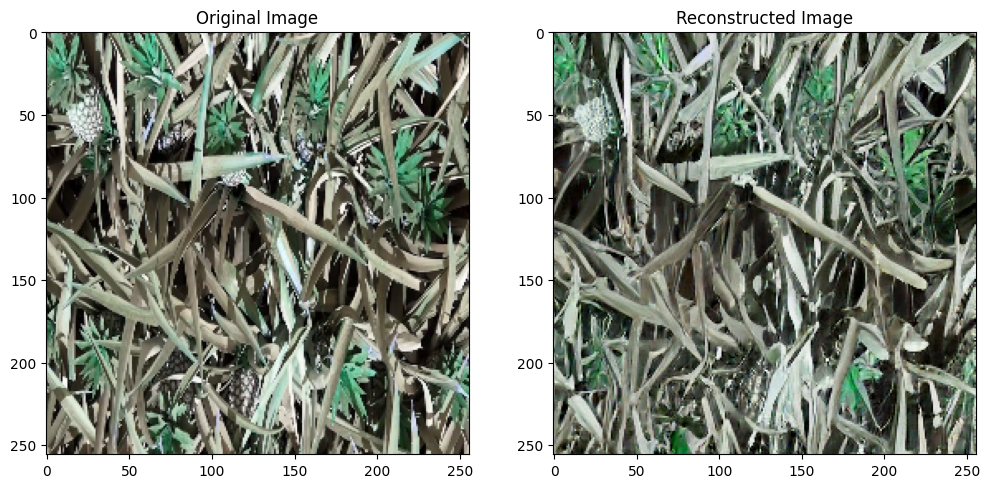

In [4]:
from dataset import PineappleDataset

import matplotlib.pyplot as plt
import numpy as np

trainset = PineappleDataset(train=True, train_ratio=0.8)

vae.eval()
vae.cuda()  # Move model to GPU if available

test_set = PineappleDataset(train=False, train_ratio=0.8)
# 2. Load the test image
test_image = test_set[0]['image']
test_image = torch.tensor(test_image).unsqueeze(0).cuda()  # Add batch dimension and move to GPU
# 3. Pass the image through the model
with torch.no_grad():
    reconstructed_image = vae(test_image)
    reconstructed_image = reconstructed_image.sample.squeeze(0).cpu().numpy()  # Remove batch dimension and move to CPU
    reconstructed_image = np.transpose(reconstructed_image, (1, 2, 0))  # Change to HWC format
    #reconstructed_image = (reconstructed_image).astype(np.uint8)  # Convert to uint8

# 4. Display the original and reconstructed images
fig = plt.figure(figsize=(12, 6))
columns = 2
rows = 1
original_image = test_set[0]['image'].transpose((1, 2, 0))
original_image = (original_image * 255).astype(np.uint8)  # Convert to uint8
# add labels to the images
fig.add_subplot(rows, columns, 1, title='Original Image')
plt.imshow(original_image)
fig.add_subplot(rows, columns, 2, title='Reconstructed Image')
plt.imshow(reconstructed_image)
plt.show()

In [9]:
reconstructed_image.shape

(1, 3, 256, 256)

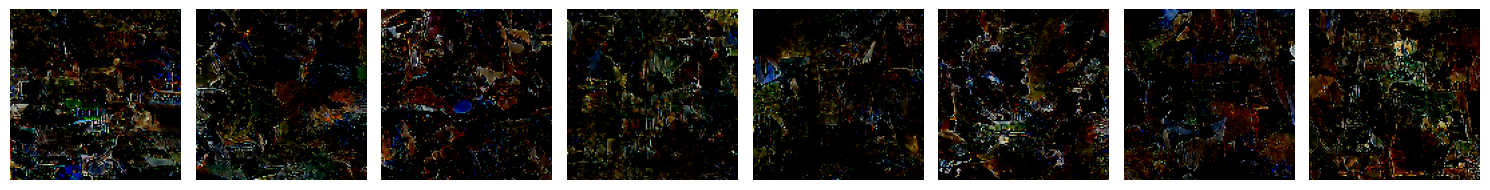

In [11]:
import matplotlib.pyplot as plt
import torch

# Your code
batch_size = 8
height, width = 128, 128
latent = torch.randn(batch_size, 4, height // 8, width // 8).cuda()

decoder = vae.decoder
reconstructed_image = decoder(latent)

# Move tensor to CPU and clamp values (for visualization)
reconstructed_image = reconstructed_image.detach().cpu().clamp(0, 1)

# Plot the images
n_images = min(batch_size, 8)  # Plot up to 8 images
fig, axes = plt.subplots(1, n_images, figsize=(15, 3))
for i in range(n_images):
    img = reconstructed_image[i].permute(1, 2, 0)  # CHW -> HWC
    axes[i].imshow(img)
    axes[i].axis("off")
plt.tight_layout()
plt.show()